<a href="https://colab.research.google.com/github/kairin/fluxgym/blob/main/FluxGym-Torch25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

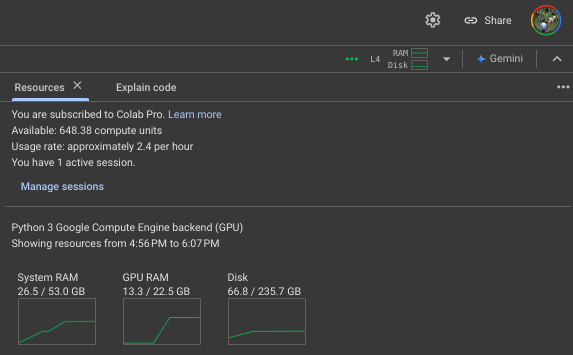

**This is meant for Colab Pro**

"Wait but there is the option for 12GB VRAM cards so what gives?"

short answer is --> Flux1-dev2pro (as explained here: https://medium.com/@zhiwangshi28/why-flux-lora-so-hard-to-train-and-how-to-overcome-it-a0c70bc59eaf)

bdsqlsz/flux1-dev2pro-single is still a 22.17GB file that cannot fit into a 12GB VRAM graphics card. so you do the math.

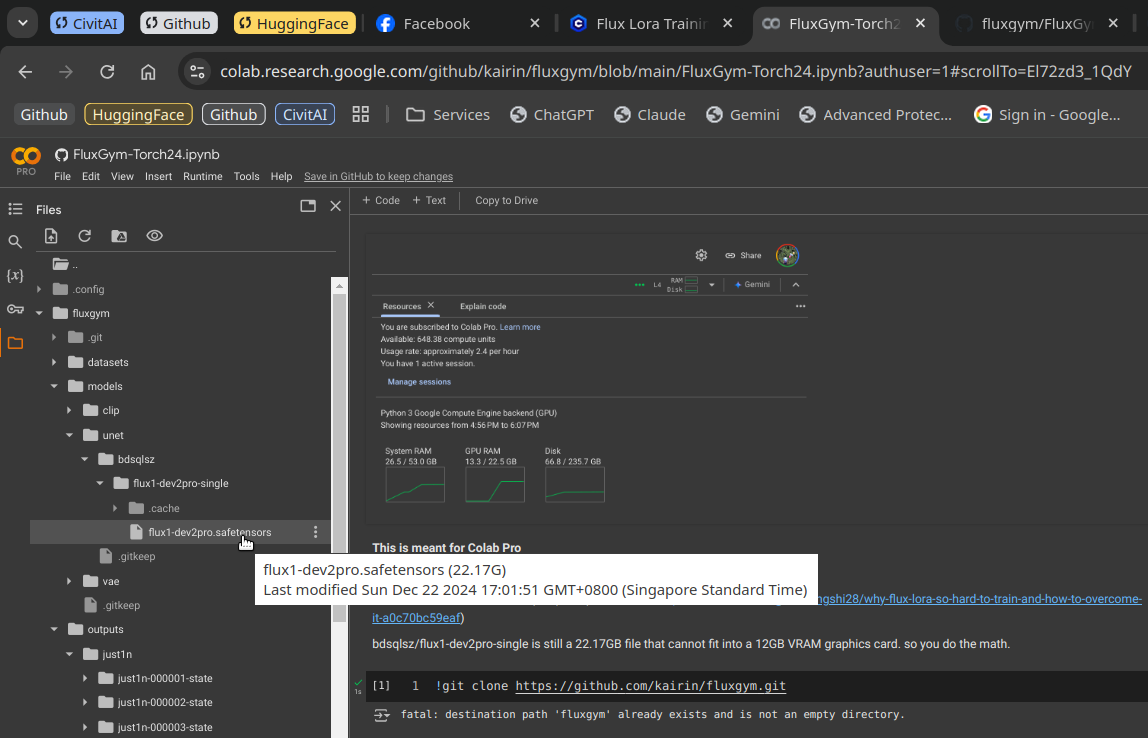


In [1]:
!git clone https://github.com/kairin/fluxgym.git

fatal: destination path 'fluxgym' already exists and is not an empty directory.


In [2]:
%cd /content/fluxgym
!git clone -b sd3 https://github.com/kohya-ss/sd-scripts

/content/fluxgym
fatal: destination path 'sd-scripts' already exists and is not an empty directory.


# **Install each projects dependencies**

In [3]:
%cd /content/fluxgym/sd-scripts/
!pip install -r requirements.txt

/content/fluxgym/sd-scripts
Obtaining file:///content/fluxgym/sd-scripts (from -r requirements.txt (line 45))
  Preparing metadata (setup.py) ... done
  Using cached diffusers-0.25.0-py3-none-any.whl.metadata (19 kB)
  Using cached huggingface_hub-0.24.5-py3-none-any.whl.metadata (13 kB)
Using cached diffusers-0.25.0-py3-none-any.whl (1.8 MB)
Using cached huggingface_hub-0.24.5-py3-none-any.whl (417 kB)
  Attempting uninstall: library
    Found existing installation: library 0.0.0
    Uninstalling library-0.0.0:
      Successfully uninstalled library-0.0.0
  Running setup.py develop for library
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.0.dev0
    Uninstalling diffusers-0.32.0.dev0:
      Successfully uninstalled diffusers-0.32.0.dev0
ERROR: pip's dependency r

In [4]:
%cd /content/fluxgym/
!pip install -r requirements.txt

/content/fluxgym
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-z8faf2q5
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-z8faf2q5
  Resolved https://github.com/huggingface/diffusers.git to commit 233dffdc3f56b26abaaba8363a5dd30dab7f0e40
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached https://huggingface.co/spaces/cocktailpeanut/gradio_logsview/resolve/main/gradio_logsview-0.0.17-py3-none-any.whl (324 kB)
  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.27.0-py3-none-any.whl (450 kB)
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=3221174 sha256=7b5ba348f026d275bdc128d6d65d9b6ef012821b646dfb6ad2d193750723af59
  Stored in directory: /tmp/pip-ephem-wheel-cache-5lk_euc8/wheels/4d/b7/a8/6f9549ceec5daad7

In [5]:
!pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
# !pip install --pre torch==2.4 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 # testing with torch 2.4 instead of torch 2.5
!pip install deepspeed

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!export TOKENIZERS_PARALLELISM=false

https://github.com/deepset-ai/haystack/issues/660#issuecomment-740453885

https://stackoverflow.com/questions/62691279/how-to-disable-tokenizers-parallelism-true-false-warning

The following error is encountered when using the basic options after loading the app.py.

this is a very frustrating error because it doesn't really explain anything at all to an ordinary person.

and as you can see, the training did continue... but there is no visual indicator on what is going on. the training continue really slowly.

```
[2024-12-22 09:33:52] [INFO] huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
[2024-12-22 09:33:52] [INFO] To disable this warning, you can either:
[2024-12-22 09:33:52] [INFO] - Avoid using `tokenizers` before the fork if possible
[2024-12-22 09:33:52] [INFO] - Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[2024-12-22 09:33:52] [INFO] huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
[2024-12-22 09:33:52] [INFO] To disable this warning, you can either:
[2024-12-22 09:33:52] [INFO] - Avoid using `tokenizers` before the fork if possible
[2024-12-22 09:33:52] [INFO] - Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[2024-12-22 09:33:52] [INFO] 2024-12-22 09:33:52 INFO     epoch is incremented. current_epoch: 0, epoch: 1      train_util.py:715
[2024-12-22 09:33:52] [INFO] 2024-12-22 09:33:52 INFO     epoch is incremented. current_epoch: 0, epoch: 1      train_util.py:715
[2024-12-22 09:43:21] [INFO] steps:   0%|          | 1/3120 [00:04<3:58:08,  4.58s/it]
steps:   0%|          | 1/3120 [00:04<3:58:10,  4.58s/it, avr_loss=0.348]
steps:   0%|          | 2/3120 [00:07<3:13:03,  3.71s/it, avr_loss=0.348]
steps:   0%|          | 2/3120 [00:07<3:13:03,  3.72s/it, avr_loss=0.381]
steps:   0%|          | 3/3120 [00:10<2:56:35,  3.40s/it, avr_loss=0.381]
steps:   0%|          | 3/3120 [00:10<2:56:36,  3.40s/it, avr_loss=0.378]
```

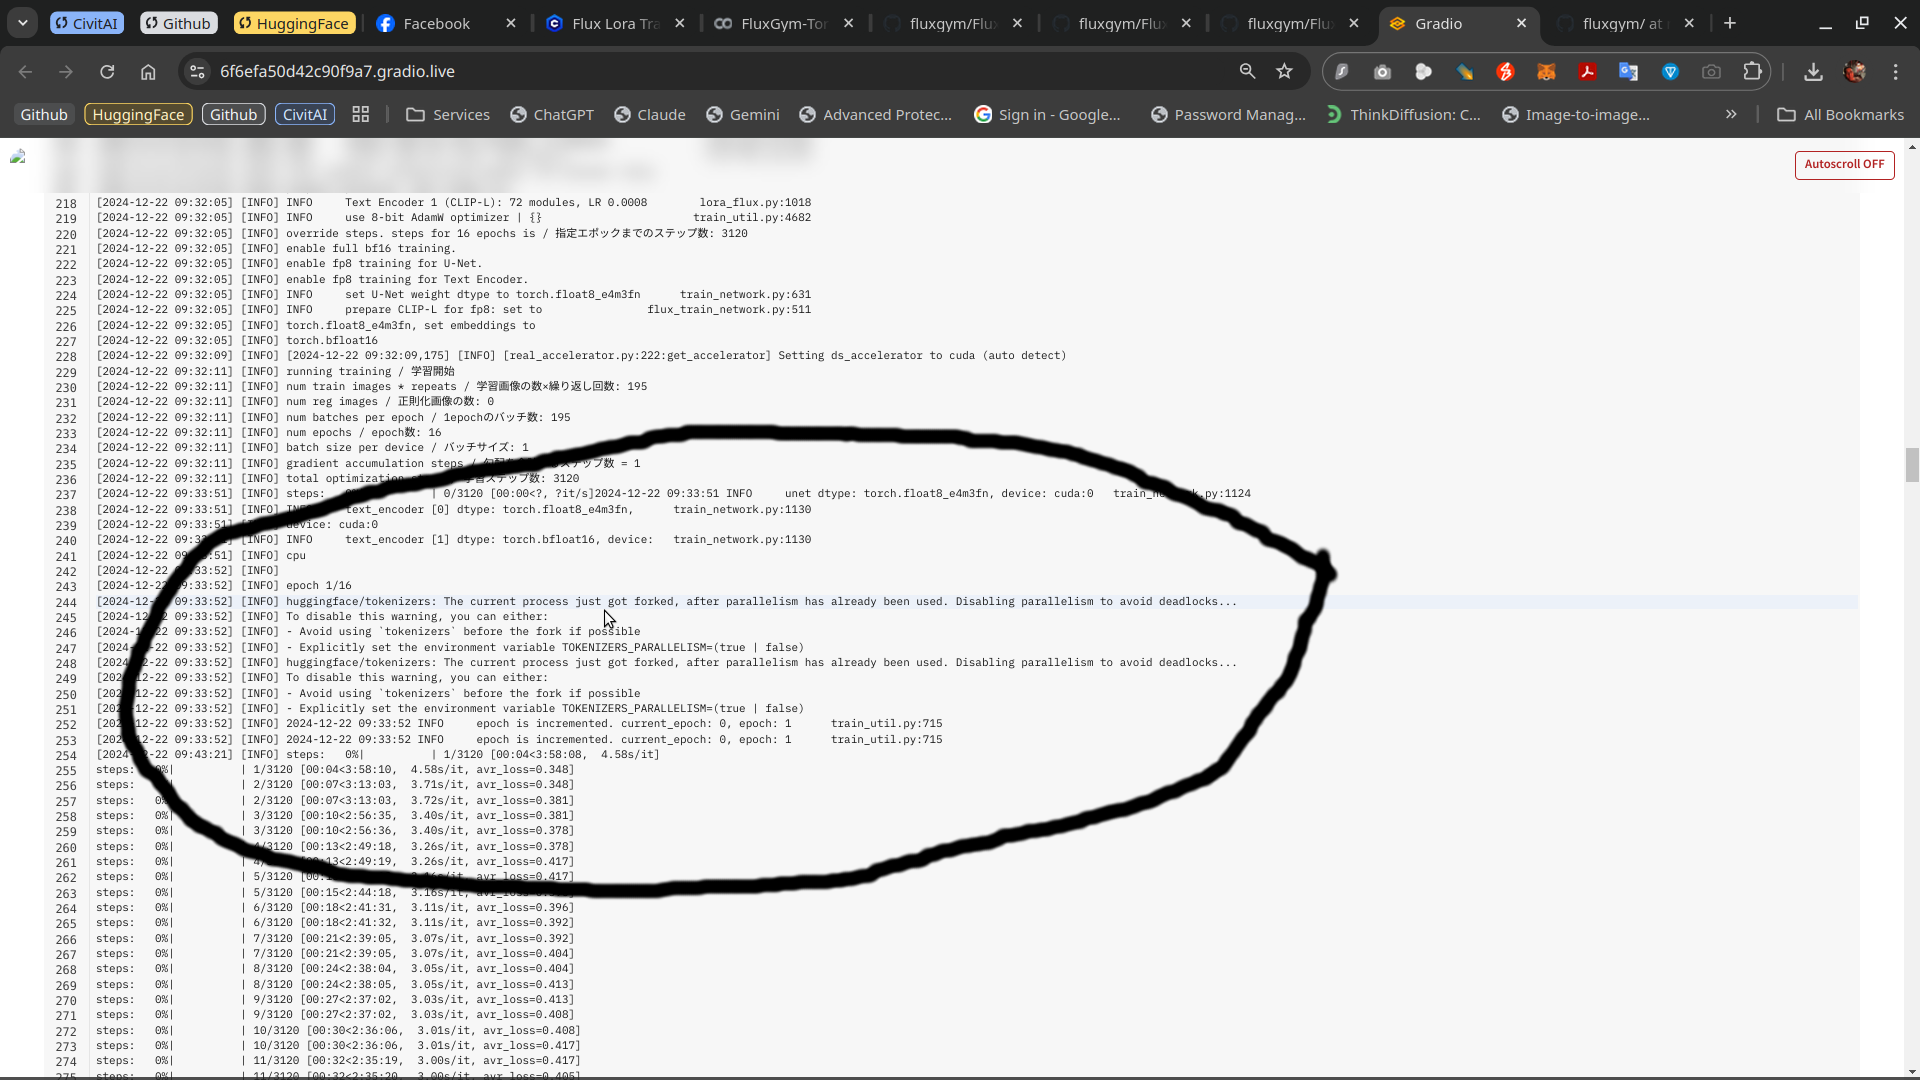

when you encounter this error, you have to wait **a very long time** before the training shows that it is in fact doing something. so just be patient.

**YOU HAVE TO WAIT**

# **Start the web server and click the share link**

In [ ]:
%cd /content/fluxgym/
# !python testapp.py
!python app.py

/content/fluxgym
2024-12-22 09:25:28.223632: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 09:25:28.238730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-22 09:25:28.259881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-22 09:25:28.266207: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-22 09:25:28.281519: I tensorflow/core/platform

# **Download the completed Loras from directory:**
fluxgym/outputs
# **Copy and paste the models URL in the section below:**

```
filename = '/content/fluxgym/outputs/file.safetensors' #your lora filename

```

In [ ]:
from google.colab import files

filename = '/content/fluxgym/outputs/file.safetensors' #your lora filename
files.download(filename)

# **Download the completed Loras from directory:**
fluxgym/outputs
# **Copy and paste the zip file URL in the section above:**

```
filename = '/content/fluxgym/outputs.zip' #your zip filename

```